<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/13-Support-Vector-Machines/02_My_SVM_Project_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines
## Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/content/wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

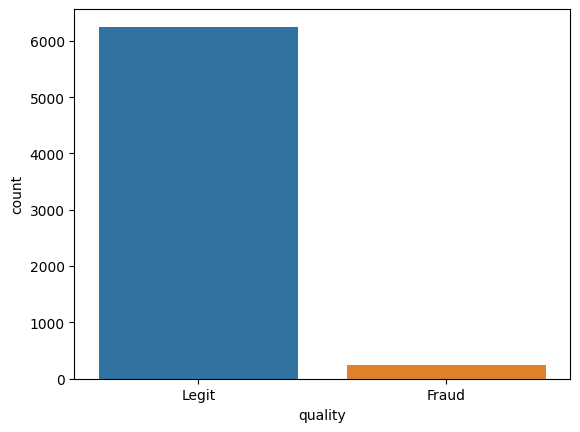

In [4]:
sns.countplot(df, x='quality')

<Axes: xlabel='type', ylabel='count'>

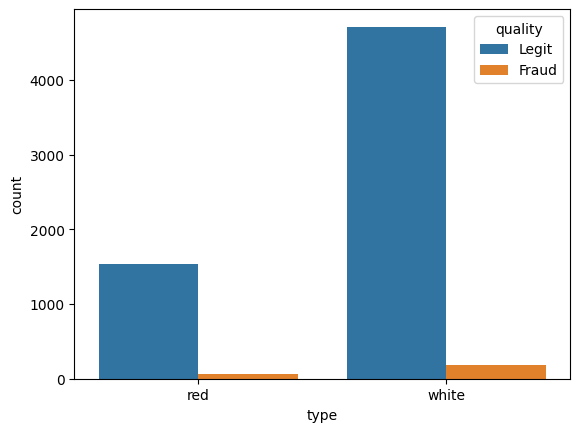

In [5]:
sns.countplot(df, x='type', hue='quality')

In [6]:
red_percent = df[(df['type']=='red') & (df['quality']=='Fraud')].count()/df[df['type']=='red'].count()*100
print('Percentage of fraud in Red Wines:\n',red_percent['type'])

Percentage of fraud in Red Wines:
 3.9399624765478425


In [7]:
white_percent = df[(df['type']=='white') & (df['quality']=='Fraud')].count()/df[df['type']=='white'].count()*100
print('Percentage of fraud in White Wines:\n',white_percent['type'])

Percentage of fraud in White Wines:
 3.7362188648427925


In [8]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})
df.corr()['Fraud']

<ipython-input-8-3d145c5c3d93>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud']


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<ipython-input-9-98f71e3ea260>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coefs = pd.Series(data=df.corr()['Fraud'][:-1])


<Axes: >

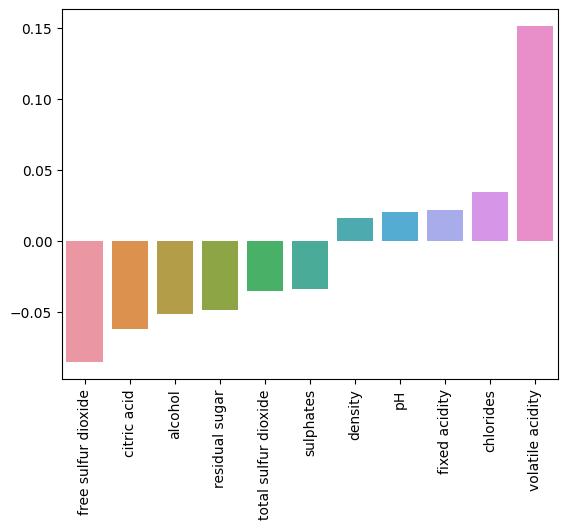

In [9]:
plt.xticks(rotation=90)
coefs = pd.Series(data=df.corr()['Fraud'][:-1])
coefs = coefs.sort_values()
sns.barplot(x=coefs.index, y=coefs.values)

<ipython-input-10-b7b834a56c94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr())


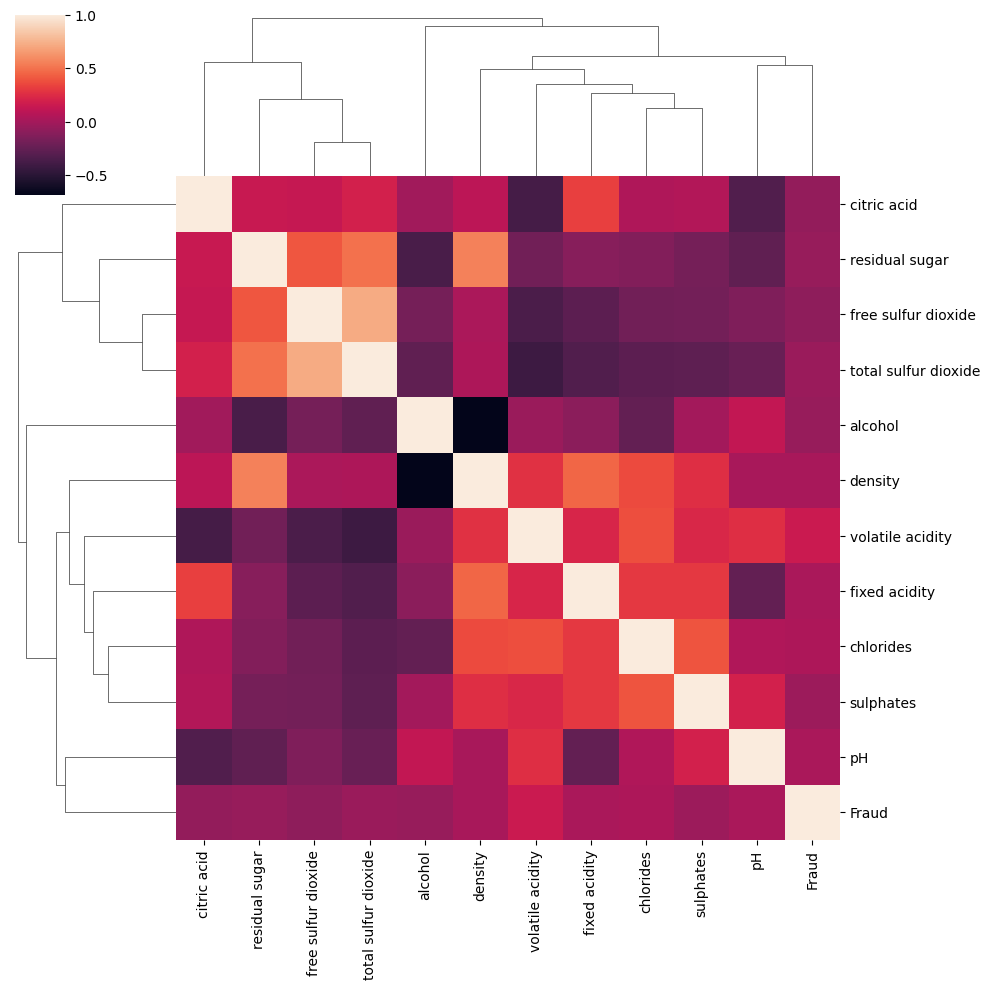

In [10]:
sns.clustermap(df.corr())

In [15]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [16]:
GridSearchCV,
# DATA SPLIT
X = df.drop(['quality'], axis=1)
y = df['quality']

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
#scaler = StandardScaler()
#scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.transform(X_test)

# PIPELINE
pipe = make_pipeline(StandardScaler(), SVC(class_weight='balanced'))
param_grid = {'svc__C':[0.001,0.01,0.1,0.5,1], 'svc__kernel':['linear','rbf','poly','sigmoid'],
              'svc__gamma':['scale', 'auto']}
grid = GridSearchCV(pipe, param_grid, verbose=3, cv=10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 2/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 3/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 4/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 5/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 6/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 7/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 8/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 9/10] END svc__C=0.001, svc__gamma=scale, svc__kernel=linear;, score=1.000 total time=   0.1s
[CV 10/10] END svc__C=0.001, svc__gamma=scale, svc__ker

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [18]:
grid.best_params_

{'svc__C': 0.001, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [21]:
y_pred = grid.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00        27
       Legit       1.00      1.00      1.00       623

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



In [28]:
confusion_matrix(y_test, y_pred)

array([[ 27,   0],
       [  0, 623]])

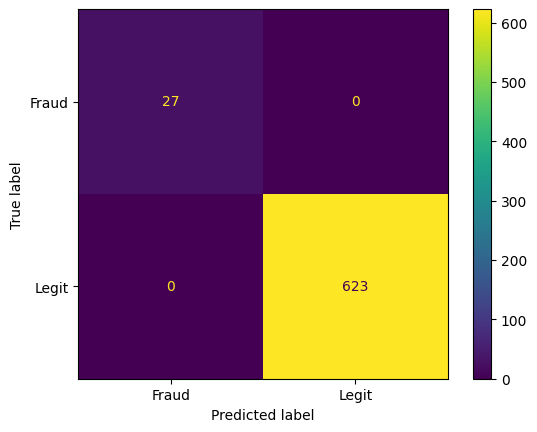

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)